In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'

In [11]:
jobs = pd.read_csv('Data/fake_job_postings.csv')
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
jobs['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [13]:
jobs['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [14]:
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [15]:
jobs.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [17]:
jobs['department'] = jobs['department'].fillna(jobs['department'].mode()[0])

In [18]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [23]:
# imputation transformer to fill missing values

# impute missing categorical data with 'Missing'
data_cat_imp = SimpleImputer(strategy='constant', fill_value='Missing')
cat_imp_feature = ["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]

# Filling numberical values through existing value
data_num_imp = SimpleImputer(strategy='constant',fill_value=None)
num_imp_feature = ["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

# Transform into column
data_imp_trans = ColumnTransformer([('data_cat_imp', data_cat_imp, cat_imp_feature), 
                                 ('data_num_imp', data_num_imp, num_imp_feature)])

# Transforming and assigning the data
transformed_data = data_imp_trans.fit_transform(jobs)

In [24]:
transformed_data

array([['Marketing Intern', 'US, NY, New York', 'Marketing', ..., 1, 0,
        0],
       ['Customer Service - Cloud Video Production', 'NZ, , Auckland',
        'Success', ..., 1, 0, 0],
       ['Commissioning Machinery Assistant (CMA)', 'US, IA, Wever',
        'Sales', ..., 1, 0, 0],
       ...,
       ['Project Cost Control Staff Engineer - Cost Control Exp - TX',
        'US, TX, Houston', 'Sales', ..., 0, 0, 0],
       ['Graphic Designer', 'NG, LA, Lagos', 'Sales', ..., 0, 1, 0],
       ['Web Application Developers', 'NZ, N, Wellington', 'Engineering',
        ..., 1, 1, 0]], dtype=object)

In [25]:
# Transforming the data into a dataframe
df_jobs_transformed = pd.DataFrame(transformed_data,
                                  columns = ["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])

In [26]:
df_jobs_transformed.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,Missing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,Other,Internship,Missing,Missing,Marketing,1,0,1,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Missing,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,2,0,1,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,Missing,Missing,Missing,Missing,Missing,3,0,1,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Missing,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,4,0,1,0,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,5,0,1,1,0


In [45]:
df_jobs_transformed.isna().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

/home/atlas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


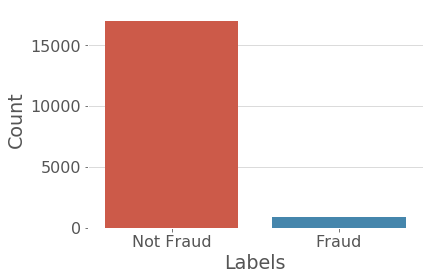

In [46]:
g = sns.countplot(df_jobs_transformed.fraudulent)
g.set_xticklabels(['Not Fraud','Fraud'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

## **Imbalanced Classes**

When classes are imbalanced, we need to resample. <br>
We have to decide if we're going to oversample or undersample

In [47]:
# class count
class_count_0, class_count_1 = df_jobs_transformed['fraudulent'].value_counts()

# Separate the classes
class_0 = df_jobs_transformed[df_jobs_transformed['fraudulent'] == 0]
class_1 = df_jobs_transformed[df_jobs_transformed['fraudulent'] == 1]
print('class_0:', class_0.shape)
print('class_1 :', class_1.shape)

class_0: (17014, 18)
class_1 : (866, 18)


## 1. Random under-sampling

Total class of 1 and 0: 0    866
1    866
Name: fraudulent, dtype: int64


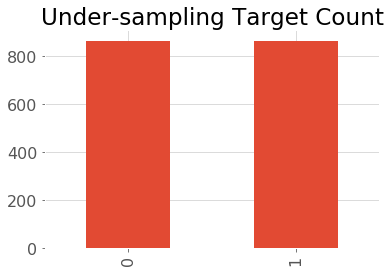

In [50]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print('Total class of 1 and 0:', test_under['fraudulent'].value_counts())
test_under['fraudulent'].value_counts().plot(kind='bar', title = 'Under-sampling Target Count')

## 2. Random over-sampling

Total class of 1 and 0: 1    17014
0    17014
Name: fraudulent, dtype: int64


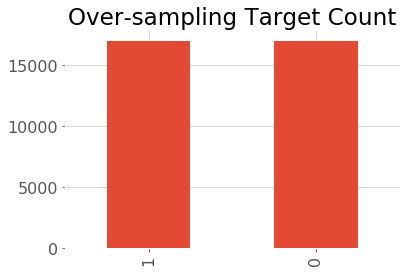

In [54]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print('Total class of 1 and 0:', test_over['fraudulent'].value_counts())
test_over['fraudulent'].value_counts().plot(kind='bar', title = 'Over-sampling Target Count')

In [56]:
df_jobs_oversample = test_over

In [58]:
df_jobs_oversample.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,job_id,telecommuting,has_company_logo,has_questions,fraudulent
17714,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",Sales,Missing,Missing,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,Missing,Missing,Missing,Missing,Missing,17715,1,0,0,1
4605,Collection Representative II,"US, TX, DALLAS",COLLECTION DEPT,30000-45000,The Accion story began more than 100 years ag...,The individual occupying this position must be...,Maintain attention and concentration for exten...,FULL- TIME BENEFITS,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service,4606,0,1,1,1
6881,Contract Recruitment Specialist,"US, TX, Houston",Engineering,Missing,Missing,Establish a functional client / service relat...,Job RequirementsFunctional Requirements:Conduc...,Missing,Missing,Missing,Missing,Missing,Missing,6882,0,0,1,1
14001,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",Sales,Missing,Missing,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,Missing,Part-time,Missing,Missing,Missing,Missing,14002,0,0,0,1
5472,Research Engineer Data Science,"US, CA, San Mateo",Engineering,Missing,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,Qualified candidates are encouraged to apply d...,Position requirements: Quickly learning new ar...,Our core values drive our culture. This is wha...,Full-time,Mid-Senior level,Master's Degree,Marketing and Advertising,Engineering,5473,0,1,1,1


In [78]:
X = df_jobs_oversample.drop('fraudulent', axis=1)
y = df_jobs_oversample.fraudulent
y = y.astype('int')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)